C:\Users\it\AppData\Local\Temp\ipykernel_2448\3290105236.py:49: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  numerical_data_v2 = filtered_data.applymap(convert_to_numerical_v2)
c:\Python\Python310\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.draw()
c:\Python\Python310\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.draw()
c:\Python\Python310\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.draw()
c:\Python\Python310\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from current font.
  fig.canvas.draw()
c:\Python\Python310\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 51012 (\N{HANGUL SYLLABLE EUL}) missing from current font.
  fig.canvas.draw()

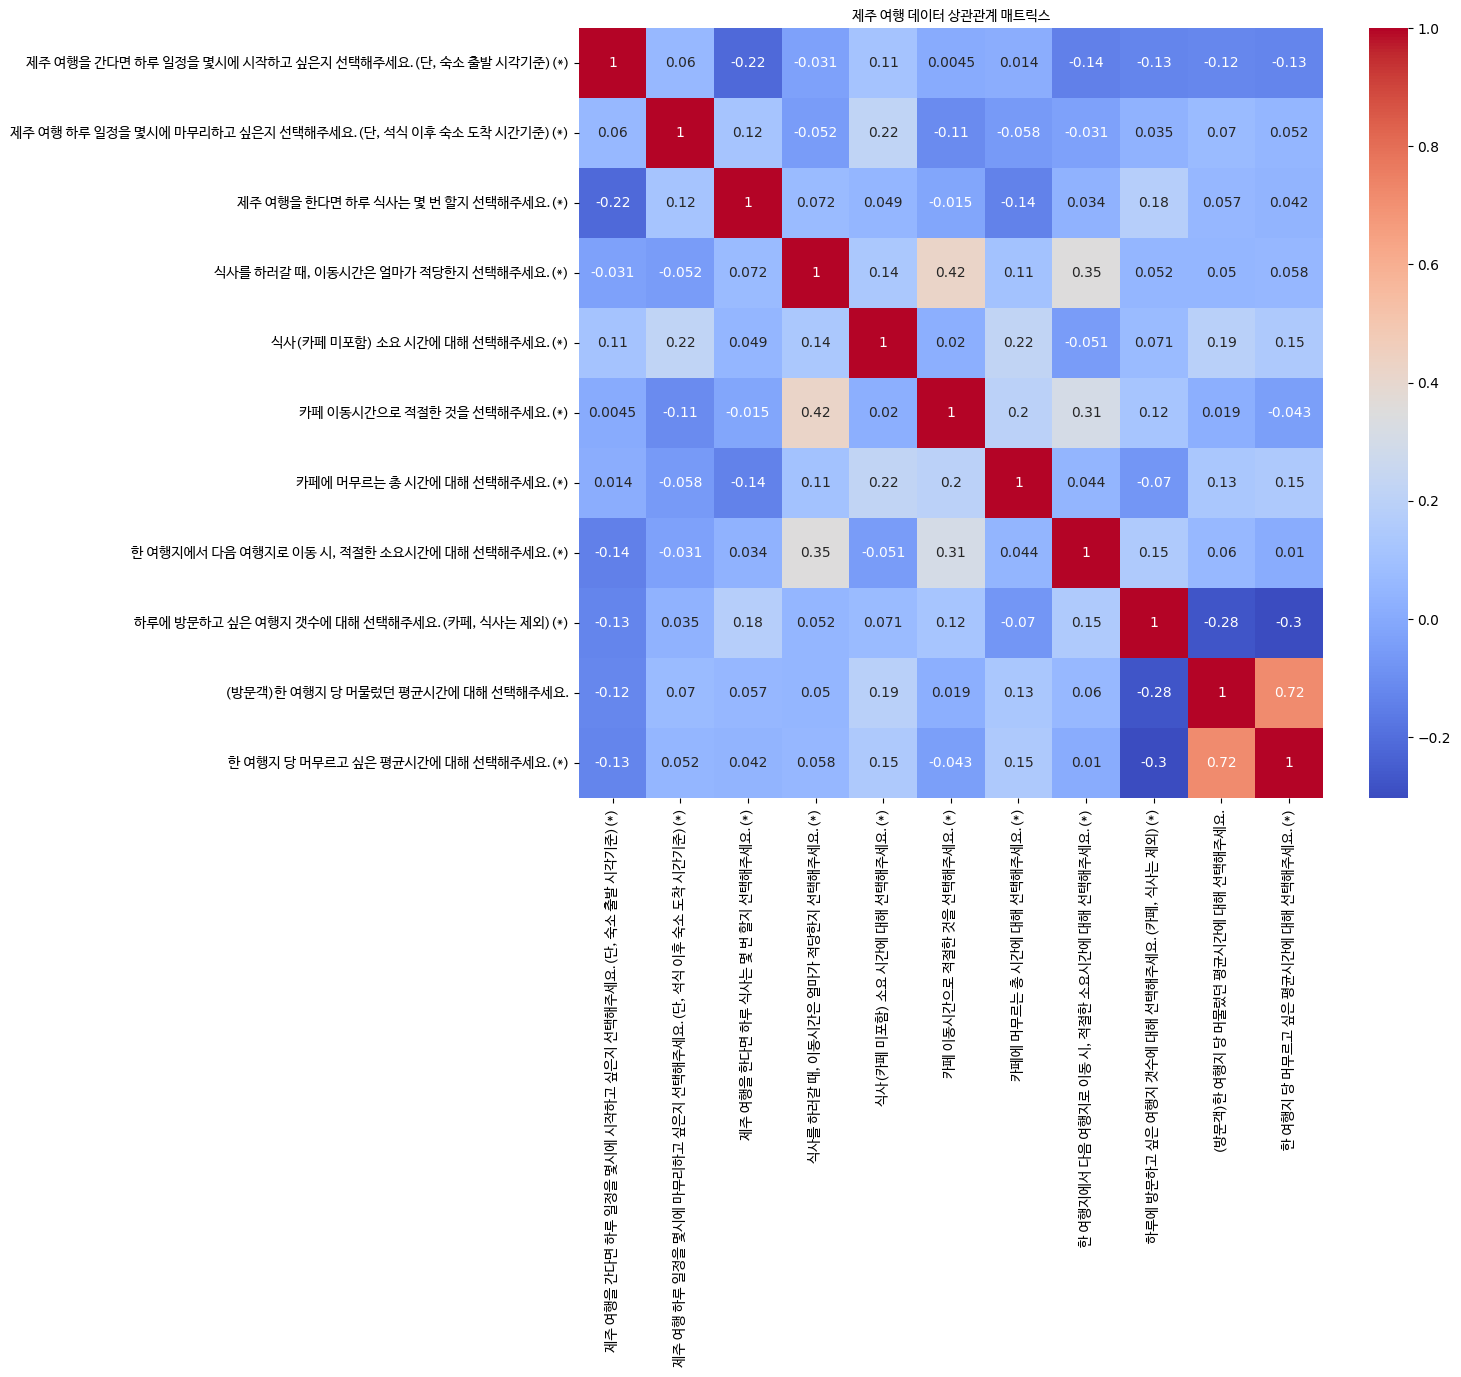

In [3]:
# 제주 여행 패턴 조사한 데이터로 각 체크리스트 항목별 상관관계 분석

import pandas as pd  # 데이터 조작을 위한 pandas 라이브러리
import seaborn as sns  # 데이터 시각화를 위한 seaborn 라이브러리
import matplotlib.pyplot as plt  # 그래프 플로팅을 위한 matplotlib 라이브러리
import matplotlib.font_manager as fm  # 사용자 지정 폰트 관리를 위한 matplotlib 폰트 매니저

# 사용자 정의 폰트 파일 경로를 지정합니다.
font_path = './NanumBarunGothic.ttf'

# 사용자 정의 폰트를 사용하기 위한 폰트 속성을 설정합니다.
font_prop = fm.FontProperties(fname=font_path)

# 데이터가 포함된 Excel 파일의 경로를 정의합니다.
file_path = './제주 여행 패턴 조사.xlsx'

# Excel 파일을 pandas DataFrame으로 읽어옵니다.
jeju_travel_data = pd.read_excel(file_path)

# 분석할 열을 선택합니다. (C열부터 Q열까지)
columns_to_analyze = jeju_travel_data.columns[2:17]

# 선택한 열만 포함한 DataFrame을 생성합니다.
filtered_data = jeju_travel_data[columns_to_analyze]

# 다양한 문자열 형식을 수치값으로 변환하는 함수를 정의합니다.
def convert_to_numerical_v2(value):
    try:
        if isinstance(value, str):
            if ':' in value:  # 시간 형식인지 확인 (예: '10:00')
                hours, minutes = value.split(':')
                return float(hours) + float(minutes) / 60
            elif '시간' in value and '분' in value:  # 지속 시간인지 확인 (예: '1시간 30분')
                hours, minutes = value.replace('시간', '').replace('분', '').split()
                return float(hours) + float(minutes) / 60
            elif '시간' in value:  # 시간 단위 지속 시간인지 확인 (예: '1시간')
                return float(value.replace('시간', '').strip())
            elif '곳' in value:  # 횟수인지 확인 (예: '2곳')
                return float(value.replace('곳', '').strip())
            elif '끼' in value:  # 식사 횟수인지 확인 (예: '3끼')
                return float(value.replace('끼', '').strip())
            elif '분' in value:  # 분 단위 시간인지 확인 (예: '30분')
                return float(value.replace('분', '').strip()) / 60
        return float(value)
    except ValueError:
        return None

# convert_to_numerical_v2 함수를 적용하여 문자열 데이터를 수치 데이터로 변환합니다.
numerical_data_v2 = filtered_data.applymap(convert_to_numerical_v2)

# 모든 NaN (누락된) 값이 포함된 열을 삭제하여 유효한 수치 데이터를 추출합니다.
valid_numerical_data_v2 = numerical_data_v2.dropna(how='all', axis=1)

# 유효한 수치 데이터에 대한 상관관계 매트릭스를 계산합니다.
correlation_matrix_valid_v2 = valid_numerical_data_v2.corr()

# 상관관계 매트릭스를 시각화하여 히트맵을 생성합니다.
plt.figure(figsize=(12, 10))  # 그림의 크기를 설정합니다.
sns.heatmap(correlation_matrix_valid_v2, annot=True, cmap='coolwarm')  # 주석이 포함된 히트맵을 생성합니다.
plt.title('제주 여행 데이터 상관관계 매트릭스', fontproperties=font_prop)  # 제목을 설정하고 사용자 정의 폰트를 적용합니다.
plt.xticks(fontproperties=font_prop)  # x축 라벨에 사용자 정의 폰트를 적용합니다.
plt.yticks(fontproperties=font_prop)  # y축 라벨에 사용자 정의 폰트를 적용합니다.
plt.show()  # 히트맵을 표시합니다.


In [5]:
# 주요관광지점 입장객 2020~2022년_v1.csv 데이터 위도/경도 좌표로 지도 매핑하여 마커 표시

import pandas as pd  
import folium 

# CSV 파일을 읽어와서 데이터프레임으로 저장합니다.
data = pd.read_csv('주요관광지점 입장객 2020~2022년_v1.csv')

# 데이터프레임에서 위도(latitude)와 경도(longitude) 정보를 추출합니다.
latitude = data.iloc[:, 4]  # 위도 정보가 있는 열을 선택합니다.
longitude = data.iloc[:, 5]  # 경도 정보가 있는 열을 선택합니다.
names = data.iloc[:, 2]  # 관광지 이름이 있는 열을 선택합니다.

# 초기 지도 생성 (초기 위치는 첫 번째 관광지의 위치로 설정합니다.)
m = folium.Map(location=[latitude[0], longitude[0]], zoom_start=10)

# 관광지 위치에 마커를 추가합니다.
for lat, lon, name in zip(latitude, longitude, names):
    folium.Marker([lat, lon], popup=name).add_to(m)
    # 각 관광지의 위도(lat), 경도(lon)를 이용하여 마커를 생성하고 관광지 이름을 팝업으로 추가합니다.

# 지도를 표시합니다.
m


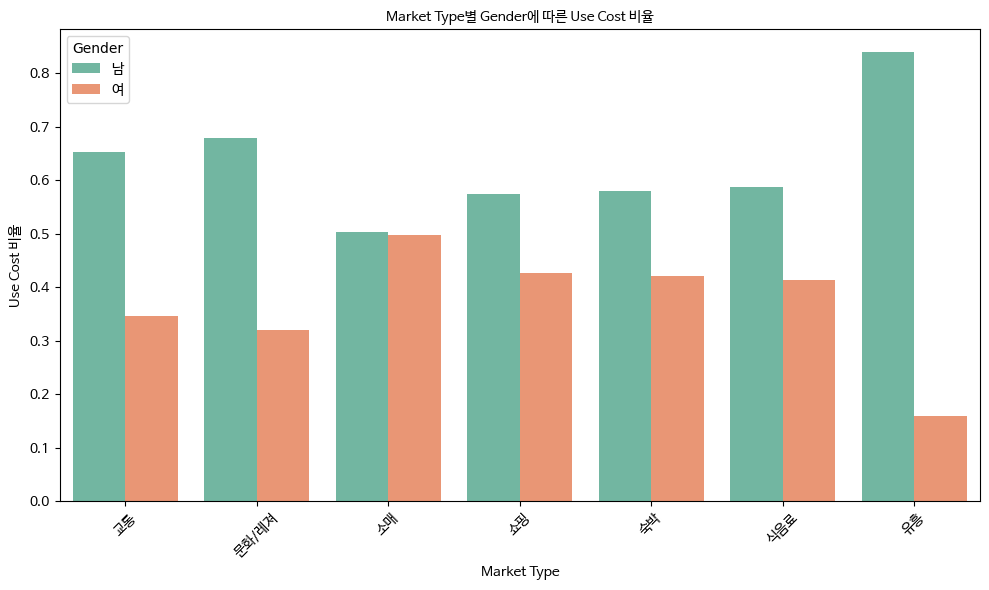

In [6]:
# 제주 관광객 카드 소비 패턴 분석
# _지역별_소비타입_연령_성별_v3.csv 관련 데이터 분석(서귀포시 도시 기준)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 사용자 정의 폰트 파일 경로를 지정합니다.
font_path = './NanumBarunGothic.ttf'

# 사용자 지정 폰트를 사용하기 위한 폰트 속성을 설정합니다.
font_prop = fm.FontProperties(fname=font_path)

# CSV 파일을 로드합니다.
csv_file_path = './_지역별_소비타입_연령_성별_v3.csv'  # CSV 파일 경로를 지정합니다. 필요에 따라 변경하세요.
df = pd.read_csv(csv_file_path)

# 'marketType'별로 'useCost'의 합계를 계산하고, 'gender'별로 그룹화합니다.
grouped_data = df.groupby(['marketType', 'gender'])['useCost'].sum().reset_index()

# 'marketType'별로 'useCost'의 비율을 계산합니다.
grouped_data['total'] = grouped_data.groupby(['marketType'])['useCost'].transform('sum')
grouped_data['useCost_ratio'] = grouped_data['useCost'] / grouped_data['total']

# 그래프를 그립니다.
plt.figure(figsize=(10, 6))  # 그래프의 크기를 설정합니다.
sns.barplot(x='marketType', y='useCost_ratio', hue='gender', data=grouped_data, palette='Set2')
# x축은 'marketType', y축은 'useCost_ratio', hue로 'gender'를 사용하여 그래프를 그립니다.
# 색상 팔레트는 'Set2'를 사용합니다.
plt.title('Market Type별 Gender에 따른 Use Cost 비율', fontproperties=font_prop)  # 그래프 제목을 설정하고 사용자 정의 폰트를 적용합니다.
plt.ylabel('Use Cost 비율', fontproperties=font_prop)  # y축 라벨을 설정하고 사용자 정의 폰트를 적용합니다.
plt.xlabel('Market Type', fontproperties=font_prop)  # x축 라벨을 설정하고 사용자 정의 폰트를 적용합니다.
plt.xticks(rotation=45, fontproperties=font_prop)  # x축 라벨의 각도와 폰트를 설정합니다.
plt.yticks(fontproperties=font_prop)  # y축 라벨의 폰트를 설정합니다.
plt.legend(title='Gender', prop=font_prop)  # 범례를 추가하고 범례 제목과 폰트를 설정합니다.
plt.tight_layout()  # 그래프를 깔끔하게 정렬합니다.

# 그래프를 출력합니다.
plt.show()


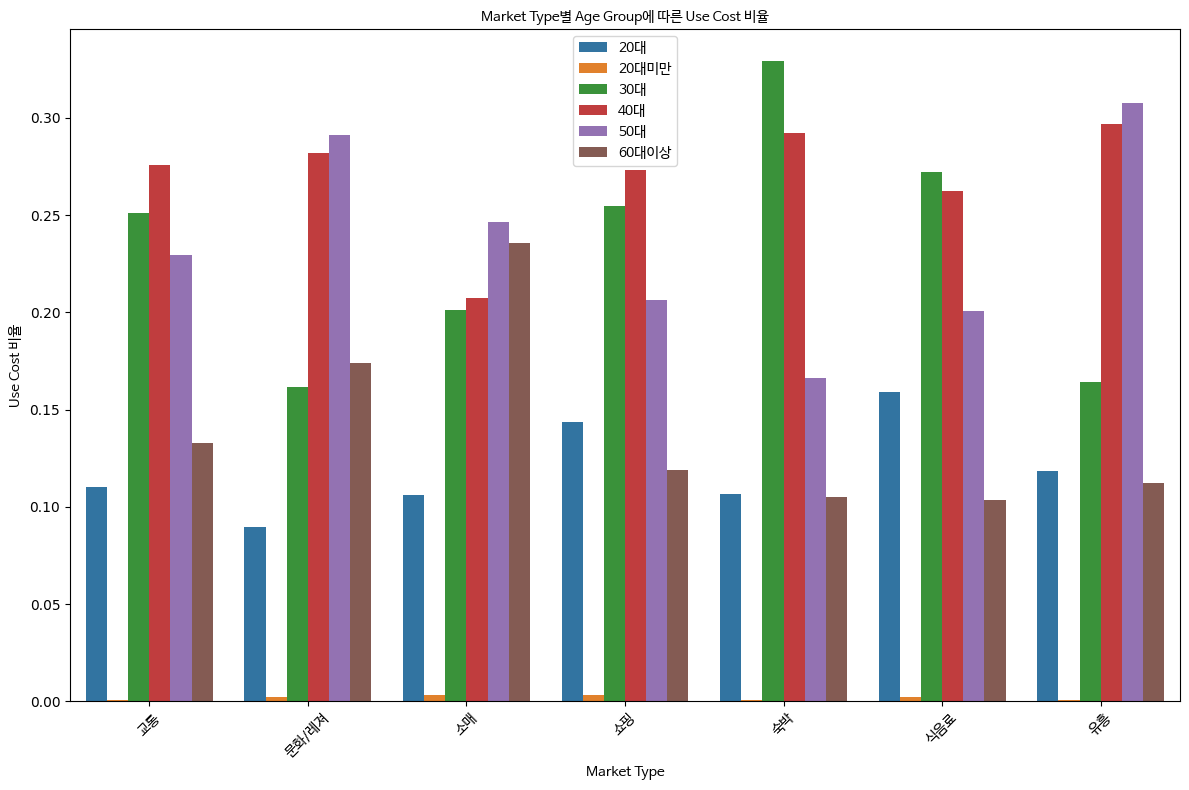

In [7]:
# 제주 관광객 카드 소비 패턴 분석
# _지역별_소비타입_연령_성별_v3.csv 관련 데이터 분석(서귀포시 도시 기준)

import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns 
import matplotlib.font_manager as fm

# 사용자 정의 폰트 파일 경로를 지정합니다.
font_path = './NanumBarunGothic.ttf'

# 사용자 지정 폰트를 사용하기 위한 폰트 속성을 설정합니다.
font_prop = fm.FontProperties(fname=font_path)

# CSV 파일을 로드합니다.
csv_file_path = './_지역별_소비타입_연령_성별_v3.csv'  # CSV 파일 경로를 지정합니다. 필요에 따라 변경하세요.
df = pd.read_csv(csv_file_path)

# 'marketType'별로 'useCost'의 합계를 계산하고, 'ageGroup'별로 그룹화합니다.
grouped_data_age = df.groupby(['marketType', 'ageGroup'])['useCost'].sum().reset_index()

# 'marketType'별로 'useCost'의 비율을 계산합니다.
grouped_data_age['total'] = grouped_data_age.groupby(['marketType'])['useCost'].transform('sum')
grouped_data_age['useCost_ratio'] = grouped_data_age['useCost'] / grouped_data_age['total']

# 그래프를 그립니다.
plt.figure(figsize=(12, 8))  # 그래프의 크기를 설정합니다.
sns.barplot(x='marketType', y='useCost_ratio', hue='ageGroup', data=grouped_data_age)
# x축은 'marketType', y축은 'useCost_ratio', hue로 'ageGroup'를 사용하여 그래프를 그립니다.
plt.title('Market Type별 Age Group에 따른 Use Cost 비율', fontproperties=font_prop)  # 그래프 제목을 설정하고 사용자 정의 폰트를 적용합니다.
plt.ylabel('Use Cost 비율', fontproperties=font_prop)  # y축 라벨을 설정하고 사용자 정의 폰트를 적용합니다.
plt.xlabel('Market Type', fontproperties=font_prop)  # x축 라벨을 설정하고 사용자 정의 폰트를 적용합니다.
plt.xticks(rotation=45, fontproperties=font_prop)  # x축 라벨의 각도와 폰트를 설정합니다.
plt.legend(prop=font_prop)  # 범례를 추가하고 범례 폰트를 설정합니다.
plt.tight_layout()  # 그래프를 깔끔하게 정렬합니다.

# 그래프를 출력합니다.
plt.show()


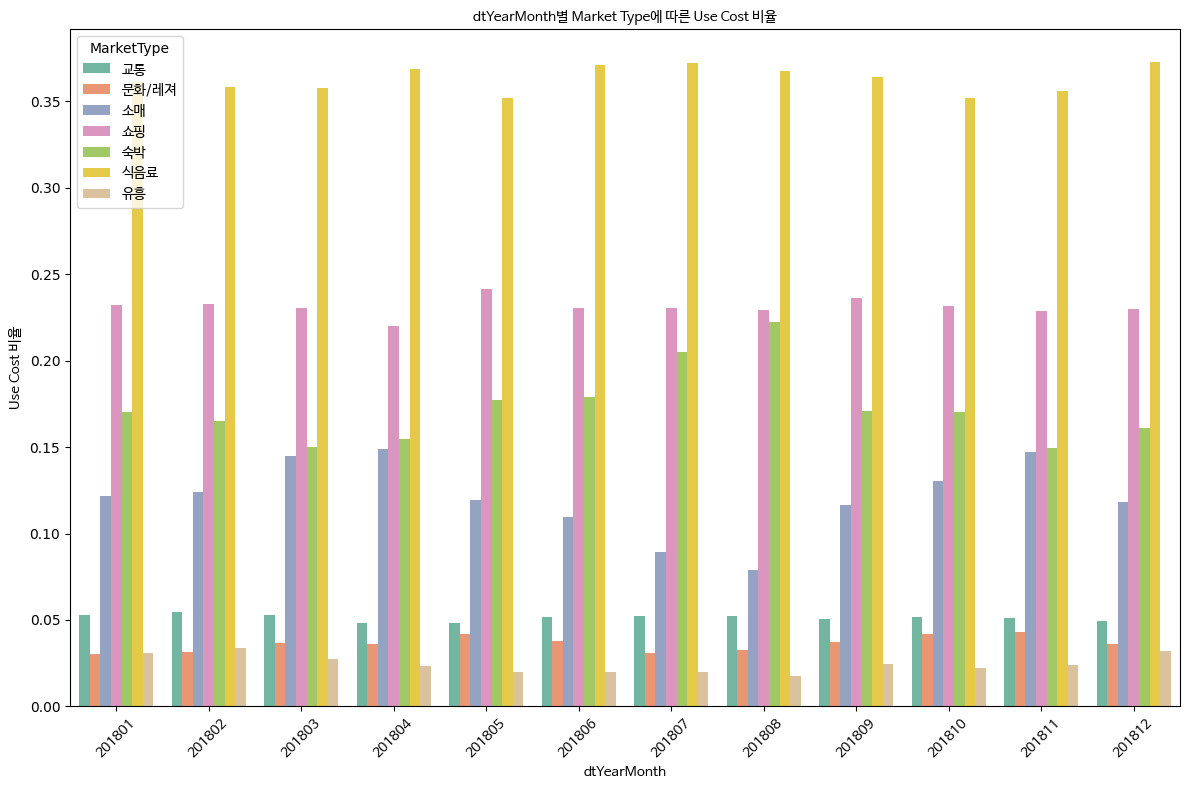

In [8]:
# 제주 관광객 카드 소비 패턴 분석
# _지역별_소비타입_연령_성별_v3.csv 관련 데이터 분석(서귀포시 도시 기준)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 사용자 정의 폰트 파일 경로를 지정합니다.
font_path = './NanumBarunGothic.ttf'

# 사용자 지정 폰트를 사용하기 위한 폰트 속성을 설정합니다.
font_prop = fm.FontProperties(fname=font_path)

# CSV 파일을 로드합니다.
csv_file_path = './_지역별_소비타입_연령_성별_v3.csv'  # CSV 파일 경로를 지정합니다. 필요에 따라 변경하세요.
df = pd.read_csv(csv_file_path)

# 'dtYearMonth'별로 'useCost'의 합계를 계산하고, 'marketType'별로 그룹화합니다.
grouped_data_month = df.groupby(['dtYearMonth', 'marketType'])['useCost'].sum().reset_index()

# 'dtYearMonth'별로 'useCost'의 비율을 계산하여 'useCost_ratio' 열을 추가합니다.
grouped_data_month['total'] = grouped_data_month.groupby(['dtYearMonth'])['useCost'].transform('sum')
grouped_data_month['useCost_ratio'] = grouped_data_month['useCost'] / grouped_data_month['total']

# 그래프를 그립니다.
plt.figure(figsize=(12, 8))  # 그래프의 크기를 설정합니다.
sns.barplot(x='dtYearMonth', y='useCost_ratio', hue='marketType', data=grouped_data_month, palette='Set2')
# x축은 'dtYearMonth', y축은 'useCost_ratio', hue로 'marketType'을 사용하여 그래프를 그립니다.
# 색상 팔레트는 'Set2'를 사용합니다.
plt.title('dtYearMonth별 Market Type에 따른 Use Cost 비율', fontproperties=font_prop)  # 그래프 제목을 설정하고 사용자 정의 폰트를 적용합니다.
plt.ylabel('Use Cost 비율', fontproperties=font_prop)  # y축 라벨을 설정하고 사용자 정의 폰트를 적용합니다.
plt.xlabel('dtYearMonth', fontproperties=font_prop)  # x축 라벨을 설정하고 사용자 정의 폰트를 적용합니다.
plt.xticks(rotation=45, fontproperties=font_prop)  # x축 라벨의 각도와 폰트를 설정합니다.
plt.legend(title='MarketType', prop=font_prop)  # 범례를 추가하고 범례 제목과 폰트를 설정합니다.
plt.tight_layout()  # 그래프를 깔끔하게 정렬합니다.

# 그래프를 출력합니다.
plt.show()


In [14]:
# 제주도 행정구역별 구획_제주 관광객 주요 관광지_식음료 데이터 히트맵 매핑

import pandas as pd
import geopandas as gpd
import folium
from folium.plugins import HeatMap 

# 관광 데이터를 로드합니다.
data_path = '주요관광지점 입장객 2020~2022년.csv'
data = pd.read_csv(data_path)

# 관광 데이터를 '총계' 기준으로 내림차순 정렬하고, 상위 13개를 선택합니다.
sorted_data = data.sort_values(by='총계', ascending=False)
top_data = sorted_data.head(13)
next_data = sorted_data.iloc[13:21]
rest_data = sorted_data.iloc[21:]

# 제주도 경계 데이터를 로드하고 좌표계를 변환합니다.
boundary_file_path = '제주도읍면동경계_final.gpkg'
jeju_boundary = gpd.read_file(boundary_file_path)
jeju_boundary_transformed = jeju_boundary.to_crs(epsg=4326)  # 좌표계를 EPSG 4326로 변환합니다.
jeju_center_transformed = jeju_boundary_transformed.geometry.unary_union.centroid  # 제주도 중심점을 계산합니다.

# 음식점 데이터를 로드하고 좌표 데이터를 정제합니다.
fnb_data_path = './FnB.csv'
fnb_data = pd.read_csv(fnb_data_path)
fnb_data['latitude'] = pd.to_numeric(fnb_data['latitude'], errors='coerce')
fnb_data['longitude'] = pd.to_numeric(fnb_data['longitude'], errors='coerce')
fnb_data = fnb_data.dropna(subset=['latitude', 'longitude'])

# FnB 데이터를 열지도(HeatMap)로 시각화하기 위한 데이터 포맷을 생성합니다.
heat_data = [[row['latitude'], row['longitude']] for index, row in fnb_data.iterrows()]

# 지도 객체를 생성합니다.
m_transformed = folium.Map(location=[jeju_center_transformed.y, jeju_center_transformed.x], zoom_start=10)

# 상위 13개 관광지에 대한 마커를 지도에 추가합니다. (빨간색 마커)
for lat, lon, name in zip(top_data['위도'], top_data['경도'], top_data['관광지']):
    folium.Marker([lat, lon], popup=name, icon=folium.Icon(color='red')).add_to(m_transformed)

# 다음 8개 관광지에 대한 마커를 지도에 추가합니다. (파란색 마커)
for lat, lon, name in zip(next_data['위도'], next_data['경도'], next_data['관광지']):
    folium.Marker([lat, lon], popup=name, icon=folium.Icon(color='blue')).add_to(m_transformed)

# 나머지 관광지에 대한 마커를 지도에 추가합니다. (녹색 마커)
for lat, lon, name in zip(rest_data['위도'], rest_data['경도'], rest_data['관광지']):
    folium.Marker([lat, lon], popup=name, icon=folium.Icon(color='green')).add_to(m_transformed)

# 제주도 경계 데이터를 지도에 추가합니다.
folium.GeoJson(
    jeju_boundary_transformed.to_json(),
    style_function=lambda x: {'color': 'black', 'weight': 2, 'fill': False},
    name='Jeju Boundaries'
).add_to(m_transformed)

# FnB 데이터를 열지도(HeatMap)로 시각화합니다.
HeatMap(heat_data).add_to(m_transformed)

# 지도를 화면에 출력합니다.
m_transformed


In [16]:
# 제주 관광객 주요 관광지_제주도 메인도로 매핑
# 제주도 메인도로 위치 좌표 마커와 도로 구분선 둘다 시각화된 상태
# 제주도 메인도로 위치 좌표 마커는 보이지 않도록 하는 작업이 필요

import pandas as pd
import folium
import geopandas as gpd

# 관광지 데이터를 CSV 파일로부터 로드합니다.
tourist_data = pd.read_csv('./주요관광지점 입장객 2020~2022년.csv')

# 데이터를 총계를 기준으로 내림차순으로 정렬하고 상위 13개, 그 다음 8개, 나머지를 분류합니다.
sorted_tourist_data = tourist_data.sort_values(by='총계', ascending=False)
top_data = sorted_tourist_data.head(13)
next_data = sorted_tourist_data.iloc[13:21]
rest_data = sorted_tourist_data.iloc[21:]

# 지도를 생성하고 초기 위치를 첫 번째 관광지의 위치로 설정합니다.
m = folium.Map(location=[top_data['위도'].iloc[0], top_data['경도'].iloc[0]], zoom_start=10)

# 관광지에 대한 마커를 추가하는 함수를 정의합니다.
def add_markers(data, map_object, color):
    for _, row in data.iterrows():
        folium.Marker(
            [row['위도'], row['경도']], 
            popup=row['관광지'], 
            icon=folium.Icon(color=color)
        ).add_to(map_object)

# 상위 13개, 다음 8개, 나머지 관광지에 대한 마커를 추가합니다. (빨간색, 파란색, 녹색 마커)
add_markers(top_data, m, 'red')
add_markers(next_data, m, 'blue')
add_markers(rest_data, m, 'green')

# GeoJSON 파일들의 경로를 딕셔너리로 정의합니다.
geojson_files = {
    "97.geojson": "./97.geojson",
    "1131.geojson": "./1131.geojson",
    "1132.geojson": "./1132.geojson",
    "1135.geojson": "./1135.geojson",
    "1136.geojson": "./1136.geojson",
    "1139.geojson": "./1139.geojson"
}

# GeoJSON 파일들을 로드하여 딕셔너리로 저장합니다.
geojson_data = {key: gpd.read_file(path) for key, path in geojson_files.items()}

# GeoJSON 데이터를 지도에 추가하는 함수를 정의합니다.
def add_geojson_to_map(geojson, map_object, color):
    folium.GeoJson(
        geojson,
        name='geojson',
        style_function=lambda x: {'color': color},
        show=True  # 기본적으로 포인트를 숨김
    ).add_to(map_object)

# 각 파일에 대한 색상을 정의합니다.
geojson_colors = {
    "1132.geojson": "blue",
    "1136.geojson": "green",
    "97.geojson": "red",
    "1131.geojson": "red",
    "1135.geojson": "red",
    "1139.geojson": "red"
}

# GeoJSON 데이터를 지도에 추가합니다.
for file, color in geojson_colors.items():
    add_geojson_to_map(geojson_data[file], m, color)

# 생성한 지도를 화면에 표시합니다.
m


In [17]:
# 제주 관광객 주요 관광지_제주도 메인도로 매핑
# 제주도 메인도로 위치 좌표 마커는 보이지 않도록 하는 작업 완성
# geojson 데이터 내에서 point 데이터 제거 후 지도에 해당 geojson 데이터 추가하는 방식으로 해결

import pandas as pd
import folium
import geopandas as gpd

# 관광지 데이터를 CSV 파일로부터 로드합니다.
tourist_data = pd.read_csv('./주요관광지점 입장객 2020~2022년.csv')

# 데이터를 총계를 기준으로 내림차순으로 정렬하고 상위 13개, 그 다음 8개, 나머지를 분류합니다.
sorted_tourist_data = tourist_data.sort_values(by='총계', ascending=False)
top_data = sorted_tourist_data.head(13)
next_data = sorted_tourist_data.iloc[13:21]
rest_data = sorted_tourist_data.iloc[21:]

# 지도를 생성하고 초기 위치를 첫 번째 관광지의 위치로 설정합니다.
m = folium.Map(location=[top_data['위도'].iloc[0], top_data['경도'].iloc[0]], zoom_start=10)

# 관광지에 대한 마커를 추가하는 함수를 정의합니다.
def add_markers(data, map_object, color):
    for _, row in data.iterrows():
        folium.Marker(
            [row['위도'], row['경도']], 
            popup=row['관광지'], 
            icon=folium.Icon(color=color)
        ).add_to(map_object)

# 상위 13개, 다음 8개, 나머지 관광지에 대한 마커를 추가합니다. (빨간색, 파란색, 녹색 마커)
add_markers(top_data, m, 'red')
add_markers(next_data, m, 'blue')
add_markers(rest_data, m, 'green')

# GeoJSON 파일들의 경로를 딕셔너리로 정의합니다.
geojson_files = {
    "97.geojson": "./97.geojson",
    "1131.geojson": "./1131.geojson",
    "1132.geojson": "./1132.geojson",
    "1135.geojson": "./1135.geojson",
    "1136.geojson": "./1136.geojson",
    "1139.geojson": "./1139.geojson"
}

# GeoJSON 데이터 로드 및 Point 지오메트리 제거
filtered_geojson_data = {}
for key, path in geojson_files.items():
    gdf = gpd.read_file(path)
    filtered_geojson_data[key] = gdf[gdf.geometry.type != 'Point']

# GeoJSON 데이터를 지도에 추가하는 함수 (Point 지오메트리 제외)
def add_geojson_to_map(filtered_geojson, map_object, color):
    folium.GeoJson(
        filtered_geojson,
        name='geojson',
        style_function=lambda x: {'color': color}
    ).add_to(map_object)

# 각 파일에 대한 색상을 정의합니다.
geojson_colors = {
    "1132.geojson": "blue",
    "1136.geojson": "green",
    "97.geojson": "red",
    "1131.geojson": "red",
    "1135.geojson": "red",
    "1139.geojson": "red"
}

# 필터링된 GeoJSON 데이터를 지도에 추가합니다.
for file, color in geojson_colors.items():
    add_geojson_to_map(filtered_geojson_data[file], m, color)

# 생성한 지도를 화면에 표시합니다.
m
# m.save('map.html')  # HTML 파일로 저장 (주석 제거 시 활성화)
